# Imports

In [1]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

import numpy as np
import pandas as pd
import os

import fitsio

from JPAS_DA.utils import aux_tools
from JPAS_DA.utils import plotting_utils
from JPAS_DA.data import crossmatch_tools
from JPAS_DA.evaluation import evaluation_tools
from JPAS_DA.data import cleaning_tools

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

# Read JPAS catalogs

In [2]:
JPAS_Ignasi = fitsio.read("/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA/jpas_idr_classification_xmatch_desi_dr1.fits.gz")

JPAS = pd.read_csv(
    "/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA/JPAS_DATA_PROPERTIES.csv"
)

In [3]:
print(JPAS_Ignasi.dtype.names)

('NUMBER', 'TILE_ID', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'MORPHTYPE', 'SPECID', 'DESI_MAG_R', 'DESI_MAG_G', 'DESI_MAG_Z', 'JPAS_RA', 'JPAS_DEC', 'label_TRANS', 'z_TRANS', 'z_err_TRANS', 'conf_gal_TRANS', 'conf_star_TRANS', 'conf_lqso_TRANS', 'conf_hqso_TRANS', 'class_TRANS', 'class_SQUEzE', 'conf_SQUEzE_0', 'z_SQUEzE_0', 'conf_SQUEzE_1', 'z_SQUEzE_1', 'conf_SQUEzE_2', 'z_SQUEzE_2', 'conf_SQUEzE_3', 'z_SQUEzE_3', 'conf_SQUEzE_4', 'z_SQUEzE_4', 'conf_gal_CBM', 'conf_lqso_CBM', 'conf_hqso_CBM', 'conf_star_CBM', 'class_CBM', 'conf_star', 'conf_gal', 'conf_lqso', 'conf_hqso', 'class', 'z', 'TARGETID', 'SURVEY', 'PROGRAM', 'HEALPIX', 'Z_DESI', 'ZERR_DESI', 'ZWARN', 'SPECTYPE', 'SUBTYPE', 'TARGET_RA', 'TARGET_DEC', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'match_sep_arcsec', 'is_in_desi_dr1')


# TARGETIDs

In [4]:
labels_uniques_JPAS, counts_uniques_JPAS = np.unique(JPAS["TARGETID"], return_counts=True)
labels_uniques_JPAS_Ignasi, counts_uniques_JPAS_Ignasi = np.unique(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]], return_counts=True)

print("Number of unique TARGETIDs JPAS:", len(labels_uniques_JPAS))
print("Total number of objects JPAS (TARGETIDs might be repeated):", np.sum(counts_uniques_JPAS))
print()
print("Number of unique TARGETIDs JPAS-Ignasi:", len(labels_uniques_JPAS_Ignasi))
print("Total number of objects JPAS-Ignasi (TARGETIDs might be repeated):", np.sum(counts_uniques_JPAS_Ignasi))

Number of unique TARGETIDs JPAS: 52020
Total number of objects JPAS (TARGETIDs might be repeated): 52020

Number of unique TARGETIDs JPAS-Ignasi: 100787
Total number of objects JPAS-Ignasi (TARGETIDs might be repeated): 102442


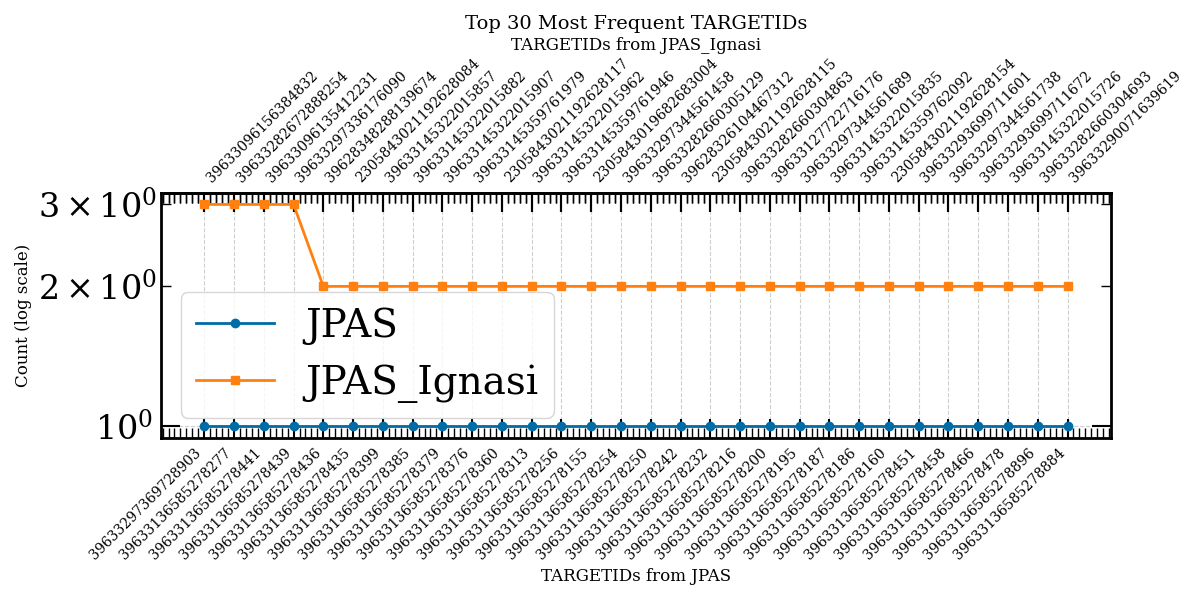

In [5]:
plotting_utils.plot_dual_targetid_logscale(
    labels_counts_A=(labels_uniques_JPAS, counts_uniques_JPAS),
    labels_counts_B=(labels_uniques_JPAS_Ignasi, counts_uniques_JPAS_Ignasi),
    top_n=30
)

In [6]:
IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
    np.array(JPAS["TARGETID"]), np.array(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]])
)
print("Number of unique TARGETIDs only in JPAS-Raul:", len(IDs_only_1))
print("Number of unique TARGETIDs only in JPAS-Ignasi:", len(IDs_only_2))
print("Number of unique TARGETIDs in both:", len(IDs_both))
if len(IDs_only_1) > 0:
    print("Total number of objects from JPAS-Raul, TARGETID only in JPAS-Raul (TARGETIDs might be repeated):", len(np.concatenate(idxs_only_1)))
if len(IDs_only_2) > 0:
    print("Total number of objects from  JPAS-Ignasi, TARGETID only in  JPAS-Ignasi (TARGETIDs might be repeated):", len(IDs_only_2))
if len(IDs_both) > 0:
    print("Total number of objects from JPAS-Raul, TARGETID in both (TARGETIDs might be repeated):", len(IDs_both))
    print("Total number of objects from  JPAS-Ignasi, TARGETID in both (TARGETIDs might be repeated):", len(IDs_both))

2025-07-18 04:21:22,454 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-07-18 04:21:22,455 - INFO - ├── 🚀 Starting ID categorization process...
2025-07-18 04:21:22,460 - INFO - |    ├── 📌 Found 122556 unique IDs across 2 arrays.
2025-07-18 04:21:22,470 - INFO - |    ├── Presence matrix created with shape: (2, 122556)
2025-07-18 04:21:22,471 - INFO - |    ├── Category mask created with shape: (2, 122556)
2025-07-18 04:21:22,471 - INFO - ├── 🚀 Starting index retrieval process...
2025-07-18 04:21:22,471 - INFO - |    ├── 📌 Processing 122556 unique IDs across 2 arrays.
2025-07-18 04:21:22,517 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-07-18 04:21:22,521 - INFO - |    ├── Processing complete: 21769 IDs only in Array 1 (17.76%).
2025-07-18 04:21:22,521 - INFO - |    ├── Processing complete: 70536 IDs only in Array 2 (57.55%).
2025-07-18 04:21:22,521 - INFO - |    ├── Processing complete: 30251 IDs in both arrays (24.68%).
2025-07-18 04:21:22,521 - INFO -

Number of unique TARGETIDs only in JPAS-Raul: 21769
Number of unique TARGETIDs only in JPAS-Ignasi: 70536
Number of unique TARGETIDs in both: 30251
Total number of objects from JPAS-Raul, TARGETID only in JPAS-Raul (TARGETIDs might be repeated): 21769
Total number of objects from  JPAS-Ignasi, TARGETID only in  JPAS-Ignasi (TARGETIDs might be repeated): 70536
Total number of objects from JPAS-Raul, TARGETID in both (TARGETIDs might be repeated): 30251
Total number of objects from  JPAS-Ignasi, TARGETID in both (TARGETIDs might be repeated): 30251


# Positions

In [7]:
POS_RAUL = np.array([JPAS['RA'], JPAS['DEC']]).T
POS_IGNASI = np.array([JPAS_Ignasi['TARGET_RA'][JPAS_Ignasi["is_in_desi_dr1"]], JPAS_Ignasi['TARGET_DEC'][JPAS_Ignasi["is_in_desi_dr1"]]]).T

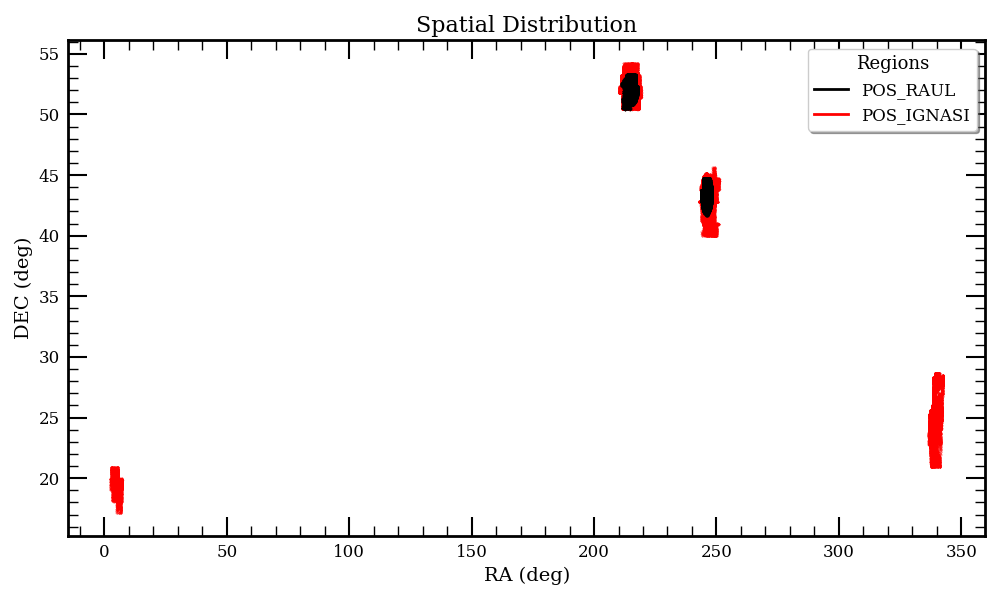

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(POS_IGNASI[:, 0], POS_IGNASI[:, 1], s=0.05, color='red', alpha=0.6)
ax.scatter(POS_RAUL[:, 0], POS_RAUL[:, 1], s=0.1, color='k', alpha=0.9)

ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_title('Spatial Distribution', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

custom_lines = [
    mpl.lines.Line2D([0], [0], color='k', lw=2, label='POS_RAUL'),
    mpl.lines.Line2D([0], [0], color='red', lw=2, label='POS_IGNASI')
]
ax.legend(handles=custom_lines, loc='upper right', fontsize=12, title="Regions", title_fontsize=13, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

In [9]:
R_arcmin, kd_counts = aux_tools.compute_kd_tree_number_of_neighbors_as_function_of_radius_in_terms_of_mean_nearest_neighbor_distance(
    POS_IGNASI
)

2025-07-18 04:21:26,845 - INFO - Mean nearest-neighbor distance: 0.0131 deg (0.79 arcmin)
2025-07-18 04:21:26,846 - INFO - Calculating number of neighbors within radius 3.14 arcmin (bin 1/7)
2025-07-18 04:21:27,417 - INFO - Calculating number of neighbors within radius 6.81 arcmin (bin 2/7)
2025-07-18 04:21:28,375 - INFO - Calculating number of neighbors within radius 10.47 arcmin (bin 3/7)
2025-07-18 04:21:29,721 - INFO - Calculating number of neighbors within radius 14.14 arcmin (bin 4/7)
2025-07-18 04:21:31,452 - INFO - Calculating number of neighbors within radius 17.80 arcmin (bin 5/7)
2025-07-18 04:21:33,553 - INFO - Calculating number of neighbors within radius 21.47 arcmin (bin 6/7)
2025-07-18 04:21:36,006 - INFO - Calculating number of neighbors within radius 25.14 arcmin (bin 7/7)
2025-07-18 04:21:38,802 - INFO - Completed kd-tree neighbor count calculation for 7 radius bins.


2025-07-18 04:21:39,184 - INFO - Generating histogram plot for neighbors' counts.
2025-07-18 04:21:39,269 - INFO - Generating spatial scatter plot with zoom-in views.
/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/JPAS_DA/utils/plotting_utils.py:508: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


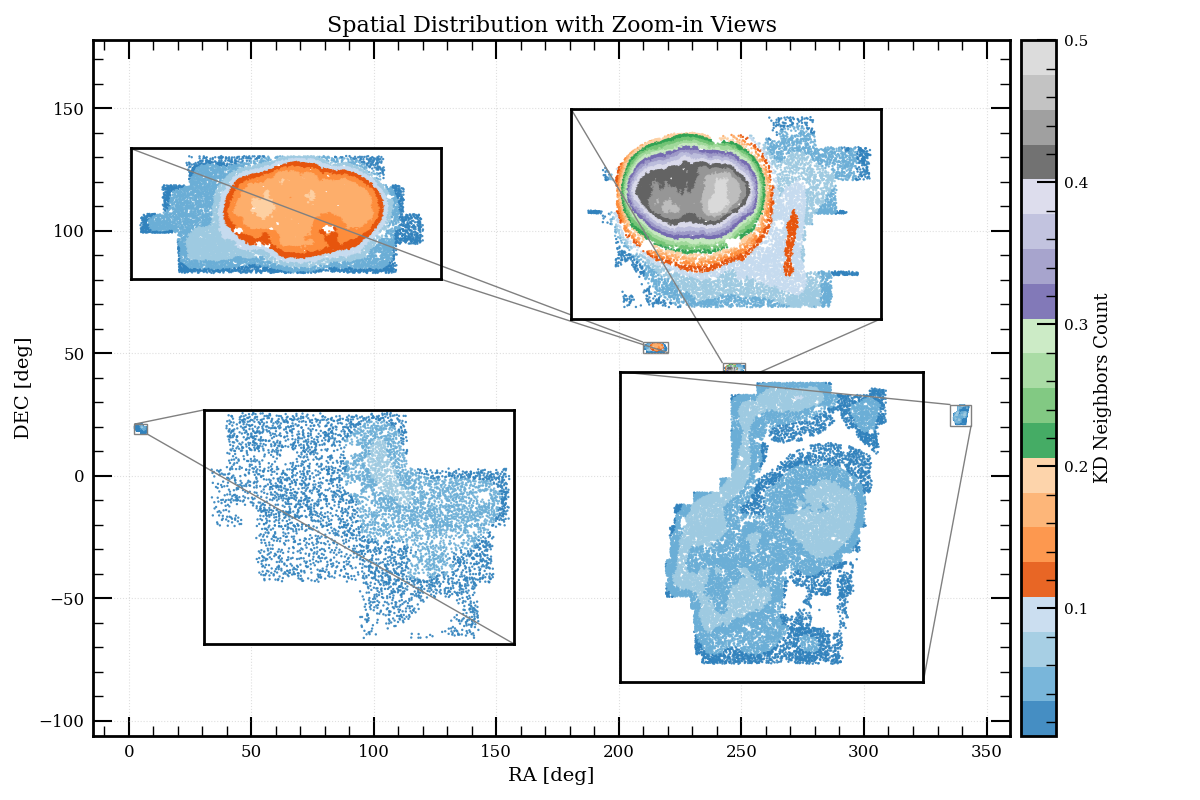

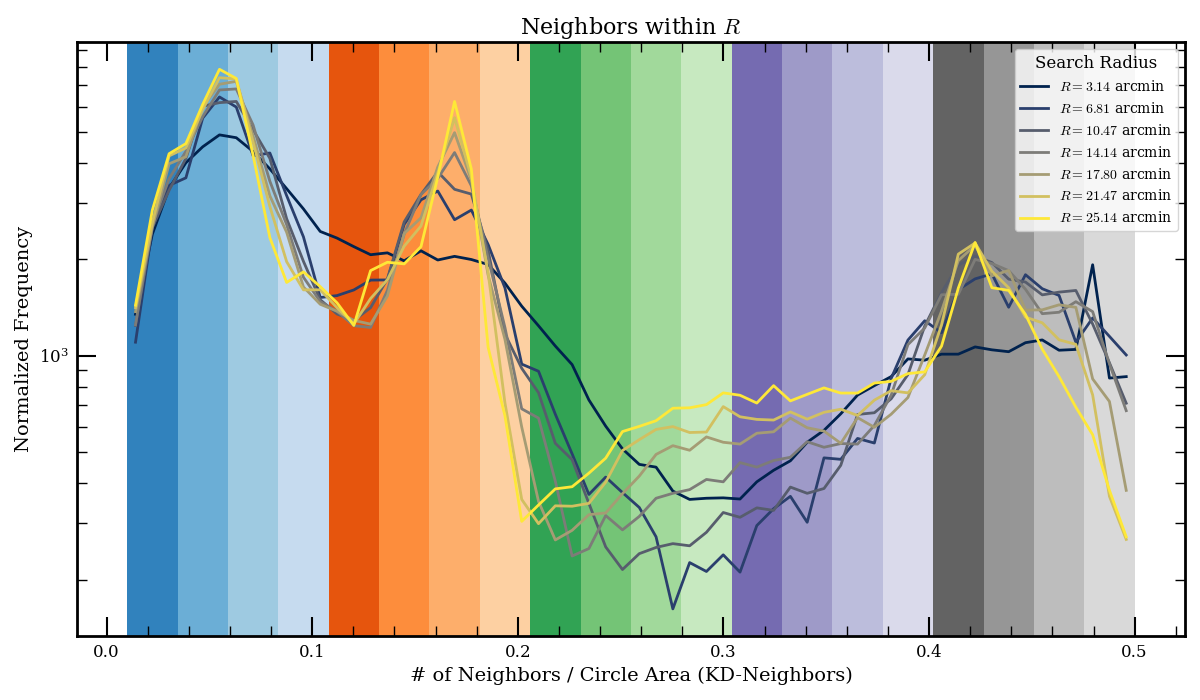

In [10]:
zoom_in_regions = {
    'min_x_array': [2.2, 209.8, 242.3, 335.3],
    'max_x_array': [7.5, 220.0, 251.6, 343.7],
    'min_y_array': [17, 50.2, 39.6, 20.4],
    'max_y_array': [21, 54.5, 45.9, 29],
    'zoom_point_sizes': [3.0, 3.0, 3.0, 3.0],
    'zoom_width': [3.1, 3.1, 3.1, 3.1],
    'zoom_height': [3.1, 3.1, 3.1, 3.1],
    'zoom_positions': [(0.1, 0.05), (0.02, 0.5), (0.5, 0.5), (0.55, 0.05)]
}
plotting_utils.plot_neighbors_and_spatial_distribution(kd_counts, R_arcmin, POS_IGNASI, min_density=0.01, max_density=0.5, zoom_in_regions=zoom_in_regions)

In [11]:
density_threshold = 0.13
mask_select_dense_KD = density_threshold < kd_counts[-1]

survey = list(np.array(JPAS_Ignasi["SURVEY"][JPAS_Ignasi["is_in_desi_dr1"]]).astype(np.str_))
survey, tmp_mapping = cleaning_tools.encode_strings_to_integers(survey)
mask_select_dense_survey = ((survey == 2) | (survey == 3))

mask_select_dense = mask_select_dense_survey | mask_select_dense_KD

2025-07-18 04:21:43,781 - INFO - ├── 🔑 Starting encoding process for string list...
2025-07-18 04:21:43,804 - INFO - |    ├── 📌 New Mapping Created: {'main': 0, 'sv1': 1, 'sv3': 2}
2025-07-18 04:21:43,804 - INFO - ├── Encoding complete (3 categories).


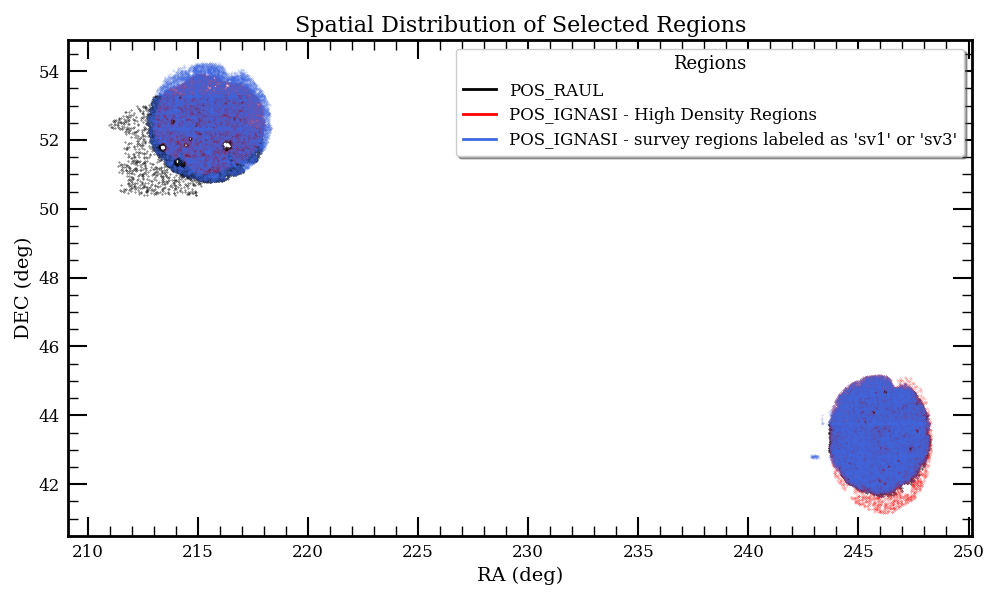

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(POS_RAUL[:, 0], POS_RAUL[:, 1], s=0.1, color='k', alpha=0.9)
ax.scatter(POS_IGNASI[mask_select_dense_KD][:, 0], POS_IGNASI[mask_select_dense_KD][:, 1], 
            s=0.05, color='red', alpha=0.6)
ax.scatter(POS_IGNASI[mask_select_dense_survey][:, 0], POS_IGNASI[mask_select_dense_survey][:, 1], 
            s=0.05, color='royalblue', alpha=0.6)
# ax.scatter(POS_IGNASI[mask_select_dense][:, 0], POS_IGNASI[mask_select_dense][:, 1], 
#             s=0.05, color='limegreen', alpha=0.6)

ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_title('Spatial Distribution of Selected Regions', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

custom_lines = [
    mpl.lines.Line2D([0], [0], color='k', lw=2, label='POS_RAUL'),
    mpl.lines.Line2D([0], [0], color='red', lw=2, label='POS_IGNASI - High Density Regions'),
    mpl.lines.Line2D([0], [0], color='royalblue', lw=2, label="POS_IGNASI - survey regions labeled as 'sv1' or 'sv3'"),
    # mpl.lines.Line2D([0], [0], color='limegreen', lw=2, label='POS_IGNASI - Combined')
]
ax.legend(handles=custom_lines, loc='upper right', fontsize=12, title="Regions", title_fontsize=13, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

In [13]:
TARGETID_1 = np.array(JPAS["TARGETID"])
TARGETID_2 = np.array(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]])

IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
    TARGETID_1, TARGETID_2
)
print("Number of unique TARGETIDs only in JPAS-Raul:", len(IDs_only_1))
print("Number of unique TARGETIDs only in JPAS-Ignasi:", len(IDs_only_2))
print("Number of unique TARGETIDs in both:", len(IDs_both))
if len(IDs_only_1) > 0:
    print("Total number of objects from JPAS-Raul, TARGETID only in JPAS-Raul (TARGETIDs might be repeated):", len(np.concatenate(idxs_only_1)))
if len(IDs_only_2) > 0:
    print("Total number of objects from  JPAS-Ignasi, TARGETID only in  JPAS-Ignasi (TARGETIDs might be repeated):", len(IDs_only_2))
if len(IDs_both) > 0:
    print("Total number of objects from JPAS-Raul, TARGETID in both (TARGETIDs might be repeated):", len(IDs_both))
    print("Total number of objects from  JPAS-Ignasi, TARGETID in both (TARGETIDs might be repeated):", len(IDs_both))

# print(TARGETID_1.shape)
# print(TARGETID_2.shape)
# print(mask_select_dense.shape)

# print(idxs_both_2.shape)
# print(idxs_both_2)

# print(idxs_both_1.shape)
# print(idxs_both_1)

# print(idxs_only_1.shape)
# print(idxs_only_1)

# print(idxs_only_2.shape)
# print(idxs_only_2)

2025-07-18 04:21:45,538 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-07-18 04:21:45,539 - INFO - ├── 🚀 Starting ID categorization process...
2025-07-18 04:21:45,543 - INFO - |    ├── 📌 Found 122556 unique IDs across 2 arrays.
2025-07-18 04:21:45,553 - INFO - |    ├── Presence matrix created with shape: (2, 122556)
2025-07-18 04:21:45,553 - INFO - |    ├── Category mask created with shape: (2, 122556)
2025-07-18 04:21:45,553 - INFO - ├── 🚀 Starting index retrieval process...
2025-07-18 04:21:45,554 - INFO - |    ├── 📌 Processing 122556 unique IDs across 2 arrays.
2025-07-18 04:21:45,598 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-07-18 04:21:45,601 - INFO - |    ├── Processing complete: 21769 IDs only in Array 1 (17.76%).
2025-07-18 04:21:45,602 - INFO - |    ├── Processing complete: 70536 IDs only in Array 2 (57.55%).
2025-07-18 04:21:45,602 - INFO - |    ├── Processing complete: 30251 IDs in both arrays (24.68%).
2025-07-18 04:21:45,602 - INFO -

Number of unique TARGETIDs only in JPAS-Raul: 21769
Number of unique TARGETIDs only in JPAS-Ignasi: 70536
Number of unique TARGETIDs in both: 30251
Total number of objects from JPAS-Raul, TARGETID only in JPAS-Raul (TARGETIDs might be repeated): 21769
Total number of objects from  JPAS-Ignasi, TARGETID only in  JPAS-Ignasi (TARGETIDs might be repeated): 70536
Total number of objects from JPAS-Raul, TARGETID in both (TARGETIDs might be repeated): 30251
Total number of objects from  JPAS-Ignasi, TARGETID in both (TARGETIDs might be repeated): 30251


In [14]:
# Start with NaN and False masks
mask_in_Ignasi = np.zeros(TARGETID_1.shape, dtype=bool)
mask_dense_if_matched = np.full(TARGETID_1.shape, np.nan, dtype=float)

# Iterate only over matched IDs (still vectorized enough because IDs_both is of manageable size)
for idx_list_1, idx_list_2 in zip(idxs_both_1, idxs_both_2):
    # Get dense mask value from first match in JPAS_Ignasi
    dense_value = mask_select_dense[idx_list_2[0]]
    # Mark all corresponding entries in TARGETID_1 as matched and dense
    mask_in_Ignasi[idx_list_1] = True
    mask_dense_if_matched[idx_list_1] = dense_value
    

# Number of TARGETID_1s matched in TARGETID_2
num_matched = np.sum(mask_in_Ignasi)
print(f"✅ Matched TARGETIDs in TARGETID_2: {num_matched} / {len(TARGETID_1)}")

# Sanity: All matched should have a non-NaN value in dense mask
num_dense_nan = np.sum(np.isnan(mask_dense_if_matched[mask_in_Ignasi]))
print(f"❌ NaNs among matched dense values: {num_dense_nan}")  # Should be 0

# Optional: Count how many are marked as dense among matched ones
num_dense = np.sum(mask_dense_if_matched[mask_in_Ignasi])
print(f"🌿 Dense entries among matched: {int(num_dense)}")

# Optional: Show a few matched entries
print("\n🔍 Sample of matched TARGETIDs and their dense values:")
matched_indices = np.where(mask_in_Ignasi)[0]
for i in matched_indices[:10]:
    print(f"  TARGETID_1[{i}] = {TARGETID_1[i]} --> Dense = {mask_dense_if_matched[i]}")


print(mask_in_Ignasi.shape)
print(mask_in_Ignasi.sum())

print(mask_dense_if_matched.shape)
print(np.nansum(mask_dense_if_matched))

✅ Matched TARGETIDs in TARGETID_2: 30251 / 52020
❌ NaNs among matched dense values: 0
🌿 Dense entries among matched: 29540

🔍 Sample of matched TARGETIDs and their dense values:
  TARGETID_1[0] = 39633109771094092 --> Dense = 1.0
  TARGETID_1[1] = 39633109771095189 --> Dense = 1.0
  TARGETID_1[2] = 39633109771095391 --> Dense = 1.0
  TARGETID_1[3] = 39633109771095543 --> Dense = 1.0
  TARGETID_1[4] = 39633109771095867 --> Dense = 1.0
  TARGETID_1[5] = 39633109771095908 --> Dense = 1.0
  TARGETID_1[6] = 39633109771096014 --> Dense = 1.0
  TARGETID_1[7] = 39633109775286551 --> Dense = 1.0
  TARGETID_1[8] = 39633109775286571 --> Dense = 1.0
  TARGETID_1[9] = 39633109775286592 --> Dense = 1.0
(52020,)
30251
(52020,)
29540.0


In [15]:
import pickle

# Your global path
global_path = "/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA"

# Full file path
file_path = os.path.join(global_path, "JPAS_DATA_PROPERTIES_AUX.pkl")

# Create the dictionary
aux_dict = {
    "mask_in_Ignasi": mask_in_Ignasi,
    "mask_dense_if_matched": mask_dense_if_matched,
}

# Save with pickle
with open(file_path, "wb") as f:
    pickle.dump(aux_dict, f)

# Masks for filters

In [16]:
colors = ['k', 'purple', 'blue', 'green', 'orange', 'red']

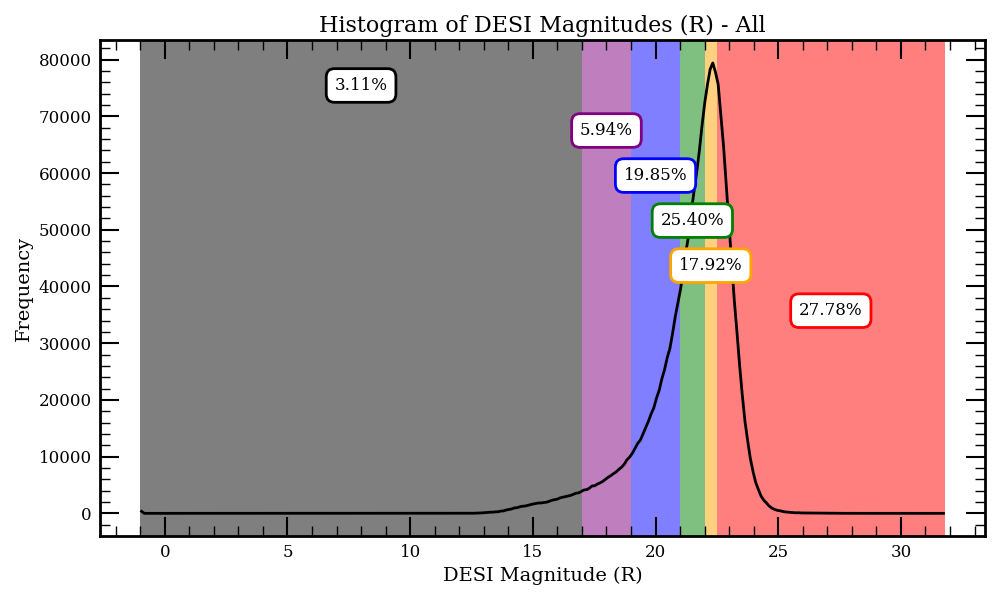

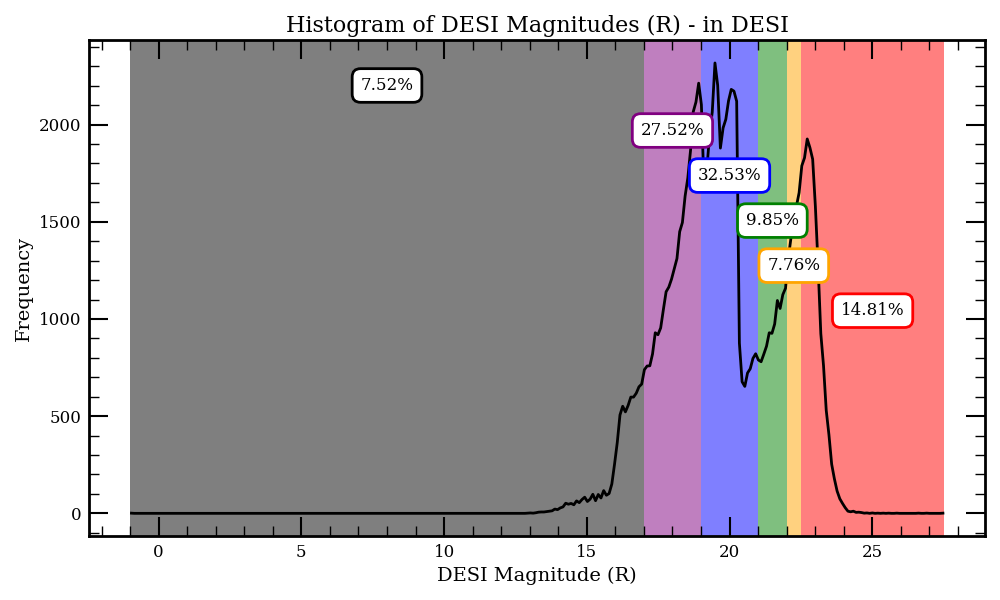

In [17]:
magnitudes_all = JPAS_Ignasi['DESI_MAG_R']
mask_finite_R_all = ~np.isinf(magnitudes_all)
magnitudes_all_finite = magnitudes_all[mask_finite_R_all]
ranges = [(np.nanmin(magnitudes_all_finite), 17), (17, 19), (19, 21), (21, 22), (22, 22.5), (22.5, np.nanmax(magnitudes_all_finite))]
masks_R_magnitudes_all_finite = plotting_utils.plot_histogram_with_ranges(
    magnitudes_all_finite, ranges=ranges, colors=colors, bins=300, x_label='DESI Magnitude (R)', title='Histogram of DESI Magnitudes (R) - All'
)

magnitudes_in_DESI = JPAS_Ignasi['DESI_MAG_R'][JPAS_Ignasi["is_in_desi_dr1"]]
mask_finite_R_in_DESI = ~np.isinf(magnitudes_in_DESI)
magnitudes_in_DESI_finite = magnitudes_in_DESI[mask_finite_R_in_DESI]
ranges = [(np.nanmin(magnitudes_in_DESI_finite), 17), (17, 19), (19, 21), (21, 22), (22, 22.5), (22.5, np.nanmax(magnitudes_in_DESI_finite))]
masks_R_magnitudes_in_DESI_finite = plotting_utils.plot_histogram_with_ranges(
    magnitudes_in_DESI_finite, ranges=ranges, colors=colors, bins=300, x_label='DESI Magnitude (R)', title='Histogram of DESI Magnitudes (R) - in DESI'
)

# Confusion Matrix

### y_true processing

2025-07-18 04:21:48,093 - INFO - ├── 🔑 Starting encoding process for string list...
2025-07-18 04:21:48,119 - INFO - |    ├── 📌 New Mapping Created: {'GALAXY': 0, 'QSO_high': 1, 'QSO_low': 2, 'STAR': 3}
2025-07-18 04:21:48,120 - INFO - ├── Encoding complete (4 categories).


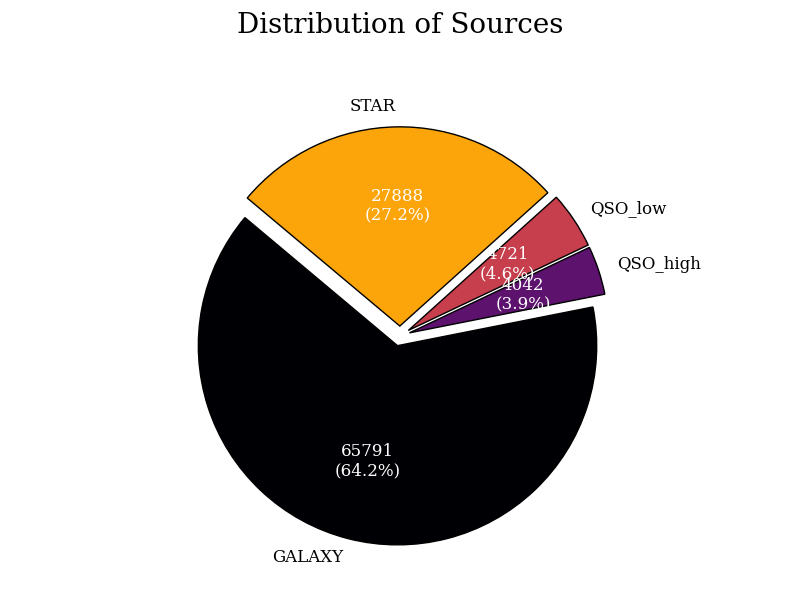

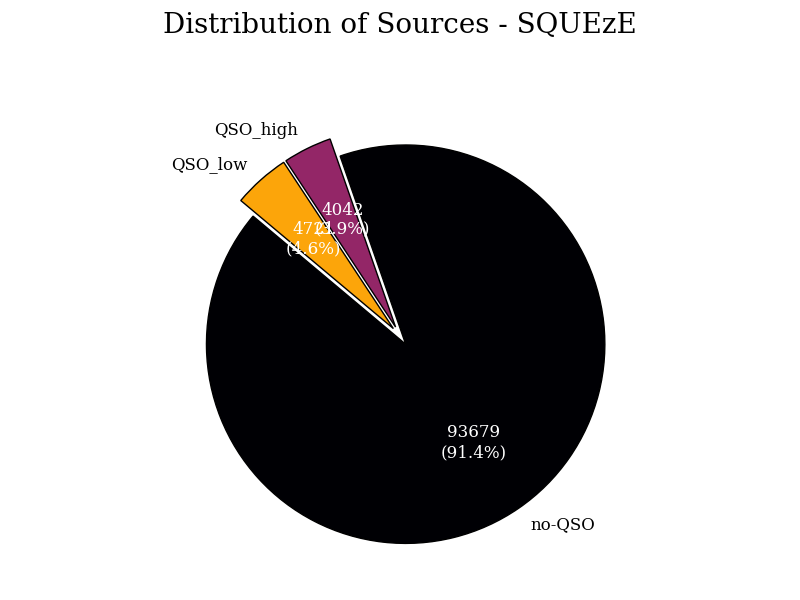

In [18]:
yy_true = np.array(JPAS_Ignasi['SPECTYPE'][JPAS_Ignasi["is_in_desi_dr1"]])
yy_true = list(np.array(yy_true).astype(np.str_))

REDSHIFT = np.array(JPAS_Ignasi['z'][JPAS_Ignasi["is_in_desi_dr1"]])

# Split between High and Low redshift quasars
z_lim_QSO_cut = 2.1
for ii in range(len(yy_true)):
    if yy_true[ii] == "QSO":
        if REDSHIFT[ii] < z_lim_QSO_cut:
            yy_true[ii] = "QSO_low"
        else:
            yy_true[ii] = "QSO_high"

yy_true, class_mapping = cleaning_tools.encode_strings_to_integers(yy_true)
class_names = list(class_mapping.keys())

unique_spectype_names, counts = np.unique(yy_true, return_counts=True)
plotting_utils.plot_pie_chart(labels=unique_spectype_names, counts=counts, title="Sources", class_names=class_names)

# y_true For SQUEzE
yy_true_SQUEzE = np.zeros_like(yy_true)
mask_no_QSO = (yy_true == 0) | (yy_true == 3)
mask_hQSO = (yy_true == 1)
mask_lQSO = (yy_true == 2)
yy_true_SQUEzE[mask_no_QSO] = 0
yy_true_SQUEzE[mask_hQSO] = 1
yy_true_SQUEzE[mask_lQSO] = 2

class_names_SQUEzE = ["no-QSO", "QSO_high", "QSO_low"]

unique_spectype_names_SQUEzE, counts_SQUEzE = np.unique(yy_true_SQUEzE, return_counts=True)
plotting_utils.plot_pie_chart(labels=unique_spectype_names_SQUEzE, counts=counts_SQUEzE, title="Sources - SQUEzE", class_names=class_names_SQUEzE)

### yy_pred_P processing

In [19]:
classification_keys = {
    "TRANS" : ['conf_gal_TRANS', 'conf_hqso_TRANS', 'conf_lqso_TRANS', 'conf_star_TRANS'],
    "CBM"   : ['conf_gal_CBM', 'conf_hqso_CBM', 'conf_lqso_CBM', 'conf_star_CBM']
}

yy_pred_P = {}
for ii, key in enumerate(classification_keys):
    yy_pred_P[key] = []
    for jj, key_type in enumerate(classification_keys[key]):
        yy_pred_P[key].append(np.array(JPAS_Ignasi[key_type][JPAS_Ignasi["is_in_desi_dr1"]]))
    yy_pred_P[key] = np.array(yy_pred_P[key]).T

tmp_SQUEzE = np.array(JPAS_Ignasi['class_SQUEzE'][JPAS_Ignasi["is_in_desi_dr1"]])
yy_pred_P["SQUEzE"] = np.column_stack([
    (tmp_SQUEzE == -1).astype(int),   # Not QSO
    (tmp_SQUEzE == 2).astype(int),    # Low-QSO
    (tmp_SQUEzE == 3).astype(int)     # High-QSO
]).astype(np.float64)

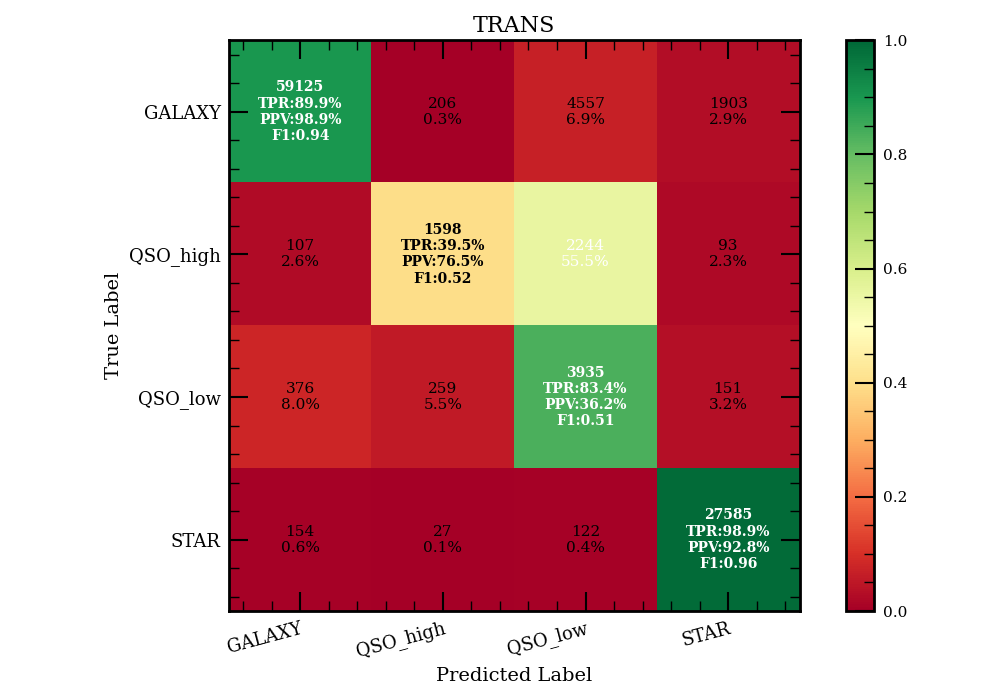

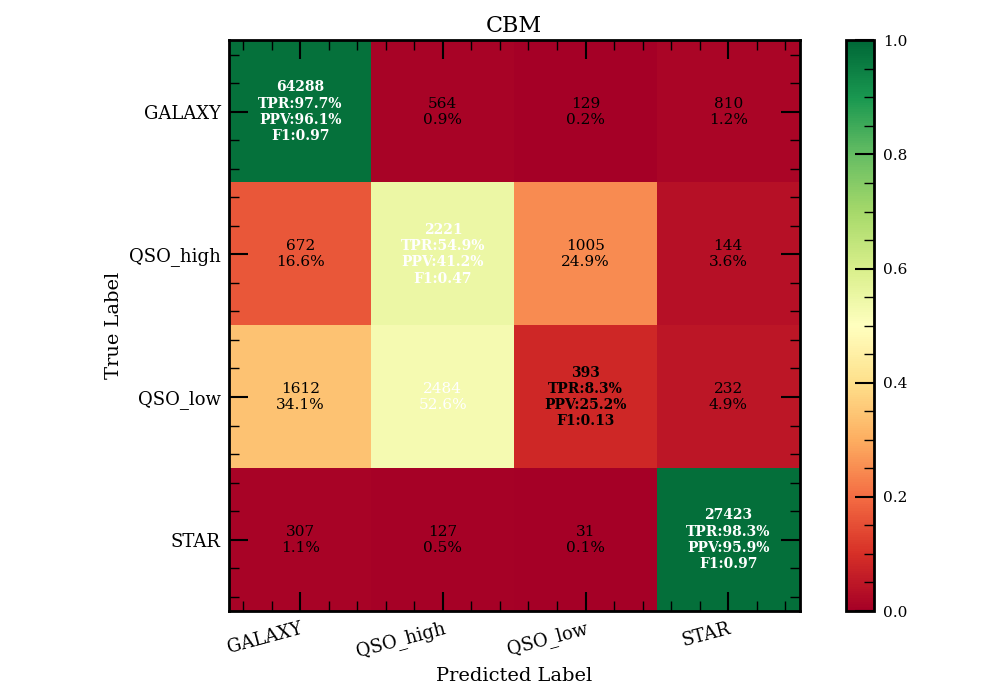

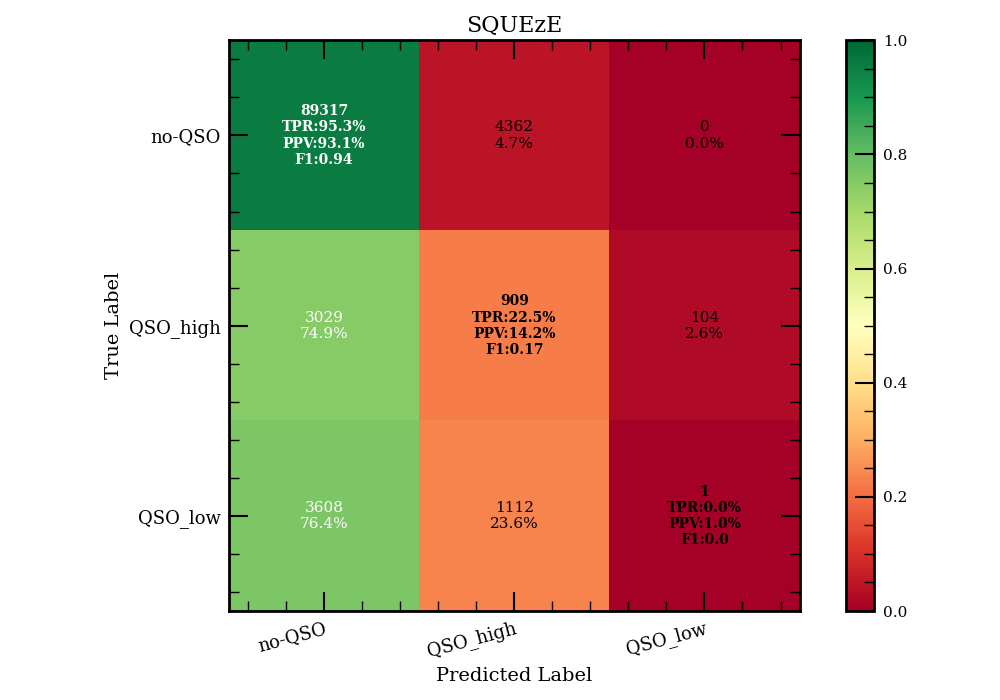

array([[89317,  4362,     0],
       [ 3029,   909,   104],
       [ 3608,  1112,     1]])

In [20]:
for ii, key in enumerate(classification_keys):
    evaluation_tools.plot_confusion_matrix(
        yy_true, yy_pred_P[key],
        class_names=class_names,
        cmap=plt.cm.RdYlGn, title=key
    )

evaluation_tools.plot_confusion_matrix(
    yy_true_SQUEzE, yy_pred_P["SQUEzE"],
    class_names=class_names_SQUEzE,
    cmap=plt.cm.RdYlGn, title="SQUEzE"
)

# Confusion Matrix with Magnitude and Dense masks

In [21]:
mask_dense_finite_R = mask_select_dense[mask_finite_R_in_DESI]

colormaps = [
    plt.cm.Greys,
    plt.cm.Purples,
    plt.cm.Blues,
    plt.cm.Greens,
    plt.cm.YlOrBr,
    plt.cm.Reds
]

In [22]:
%autoreload

2025-07-18 04:21:51,535 - WARNING - Missing classes in the confusion matrix: [1]


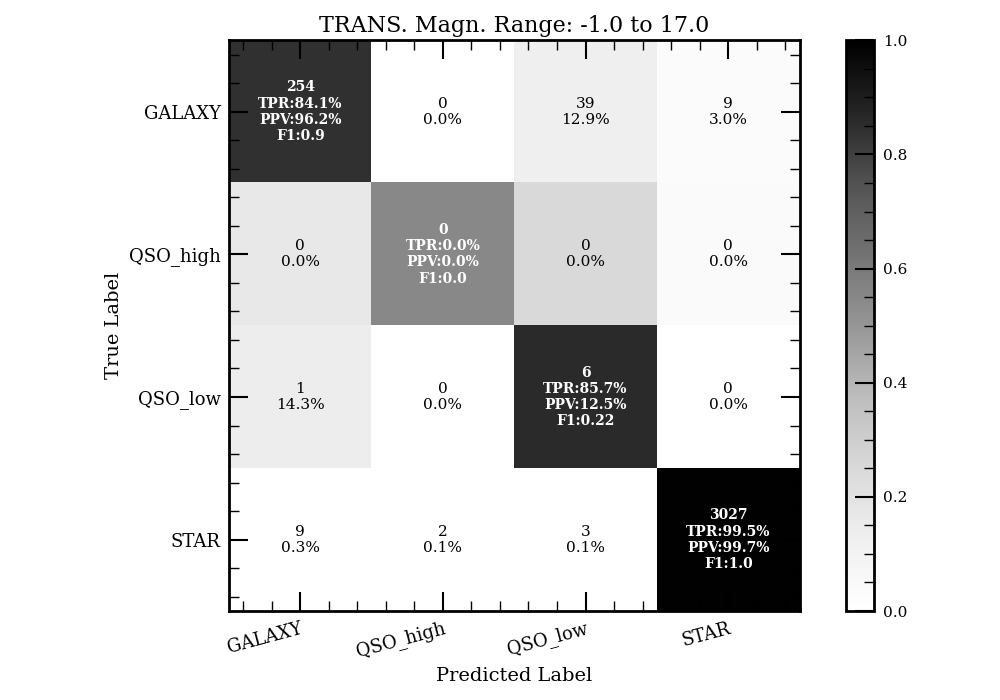

2025-07-18 04:21:51,641 - WARNING - Missing classes in the confusion matrix: [1]


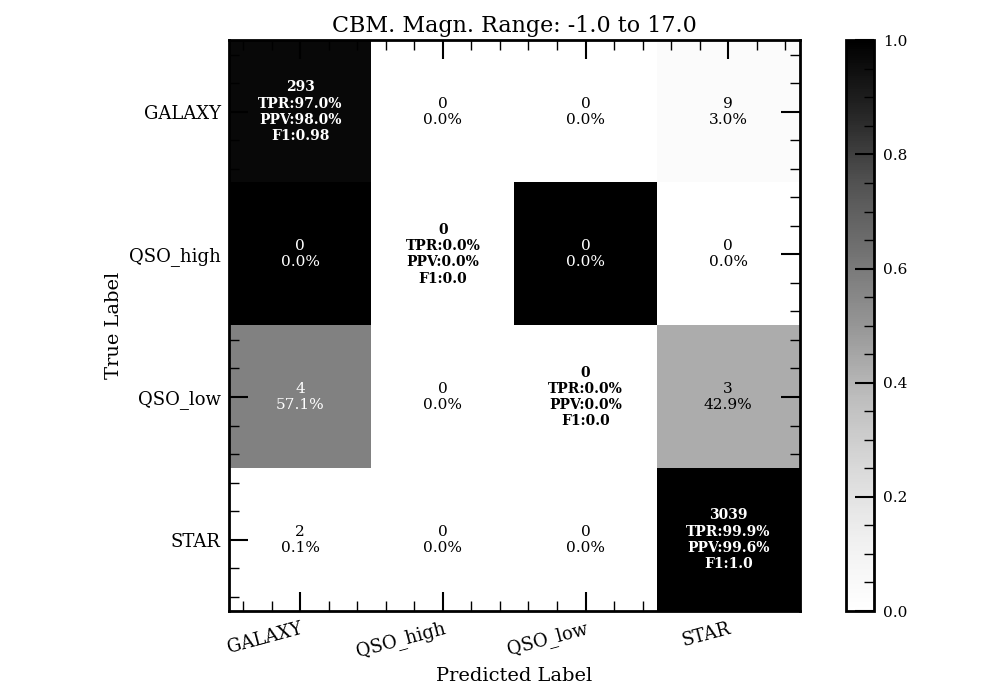

2025-07-18 04:21:51,829 - WARNING - Missing classes in the confusion matrix: [1]


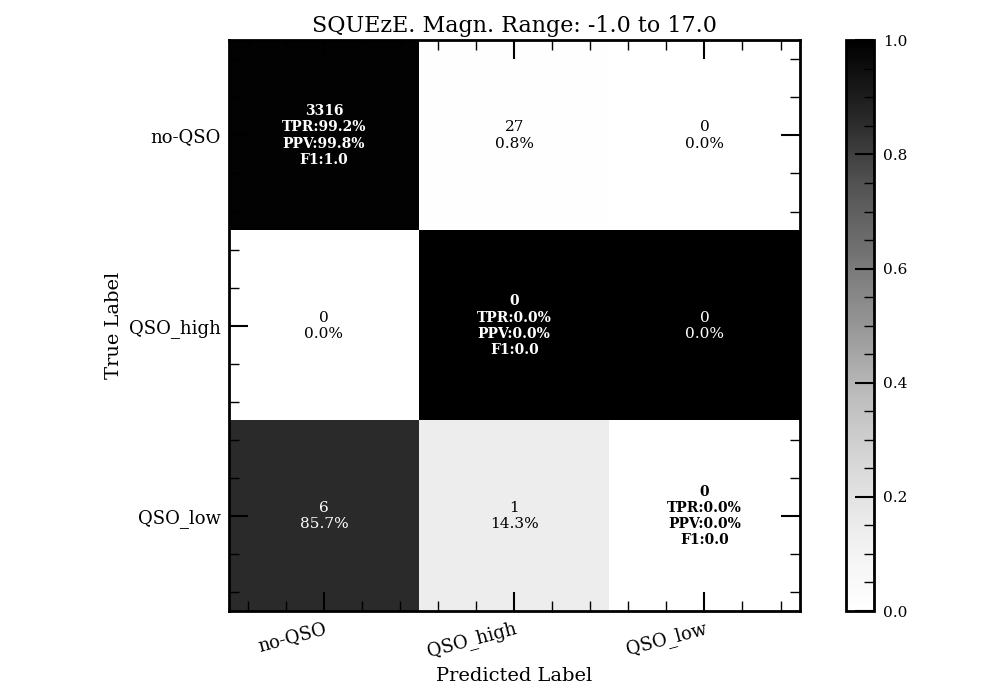

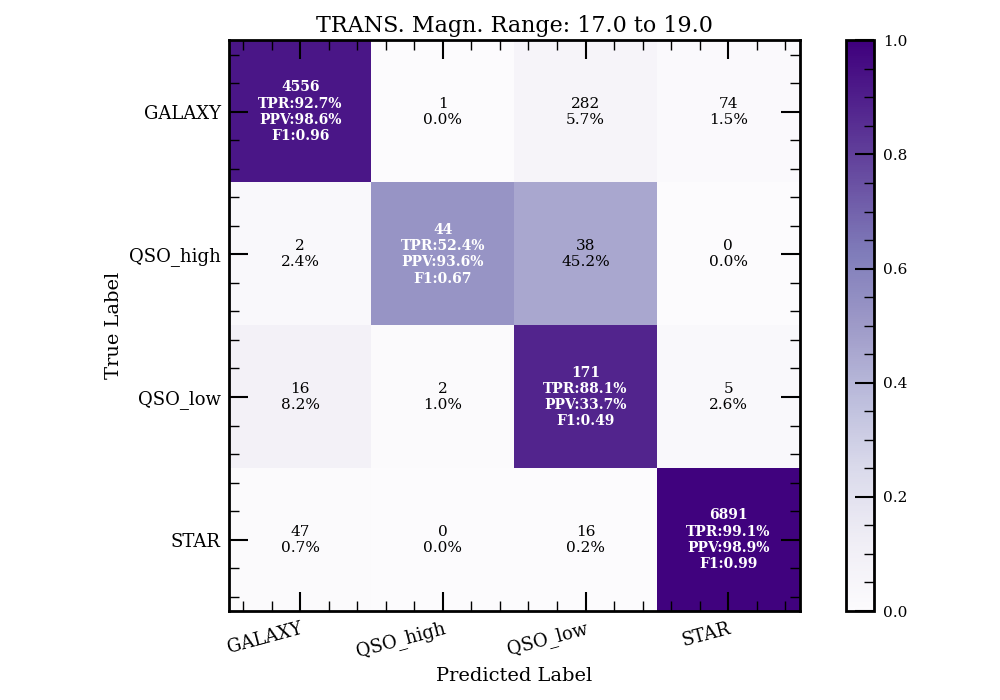

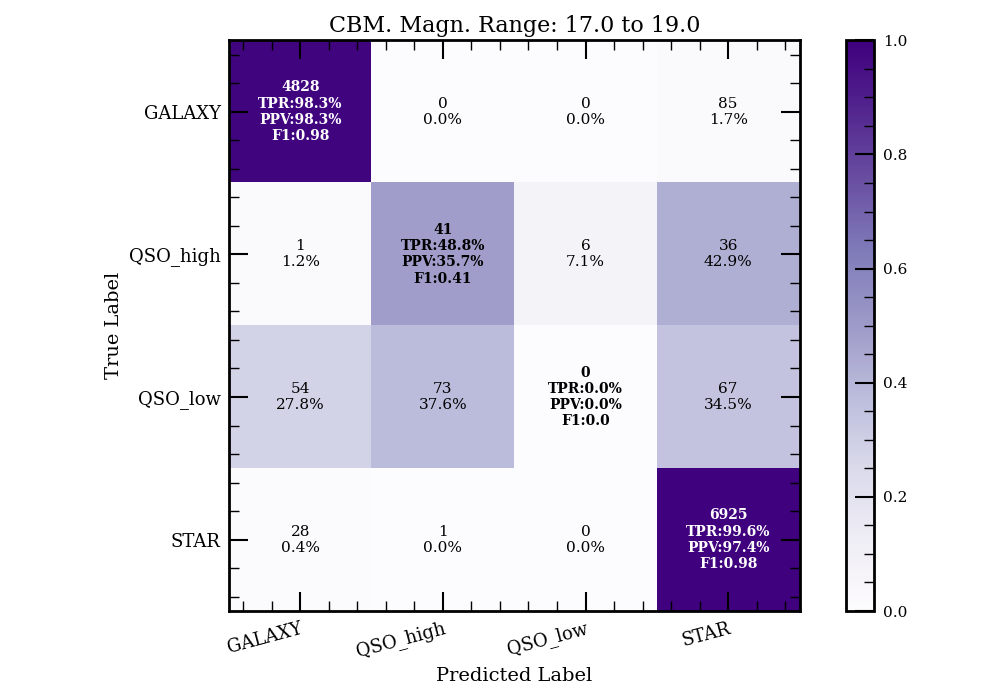

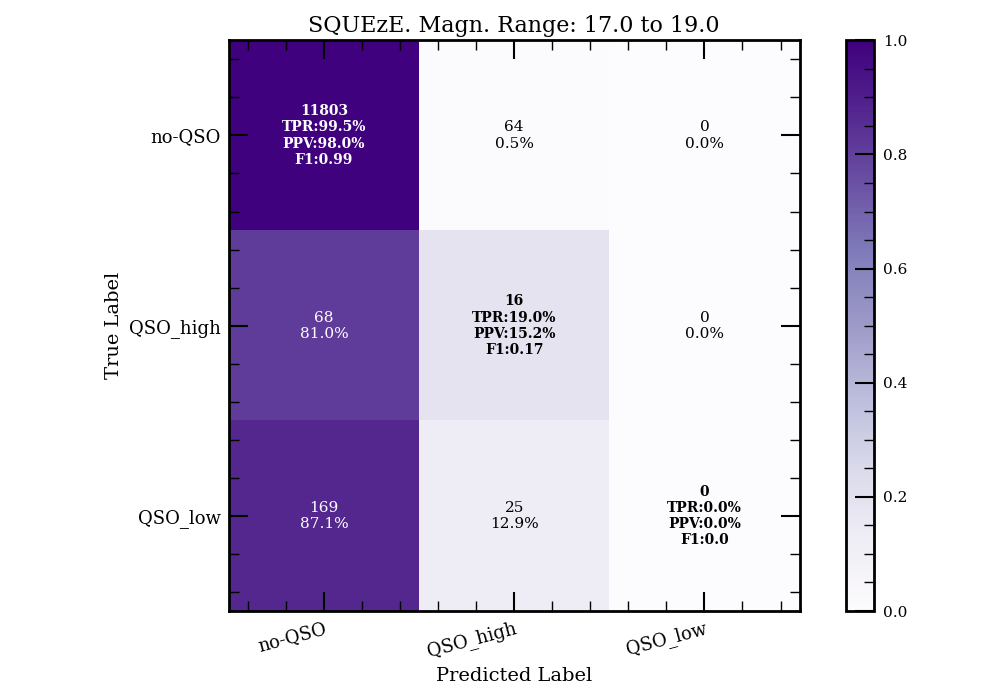

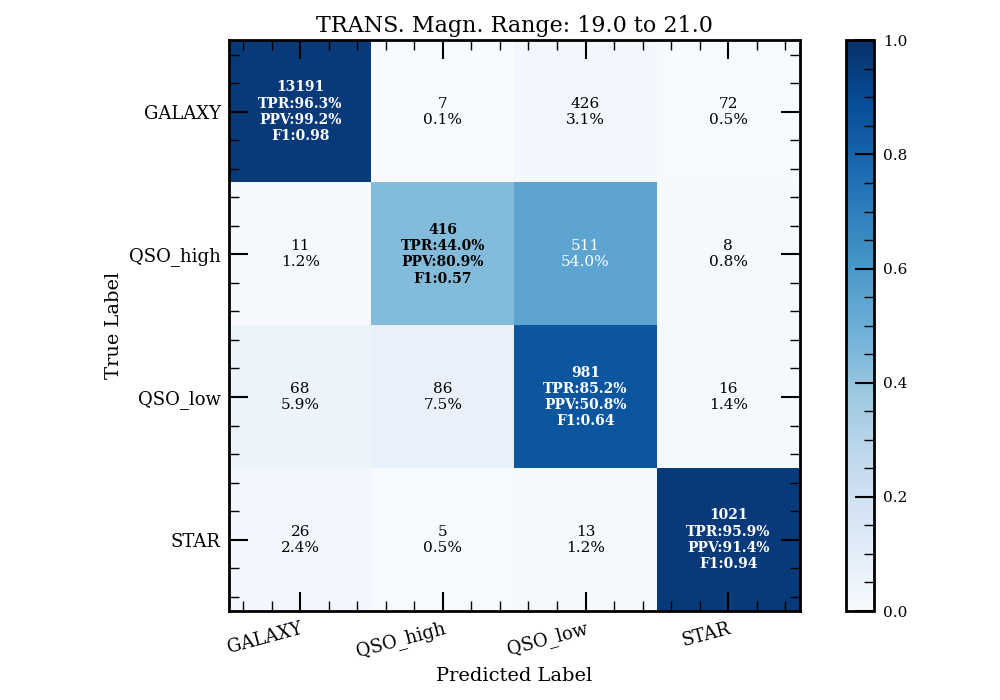

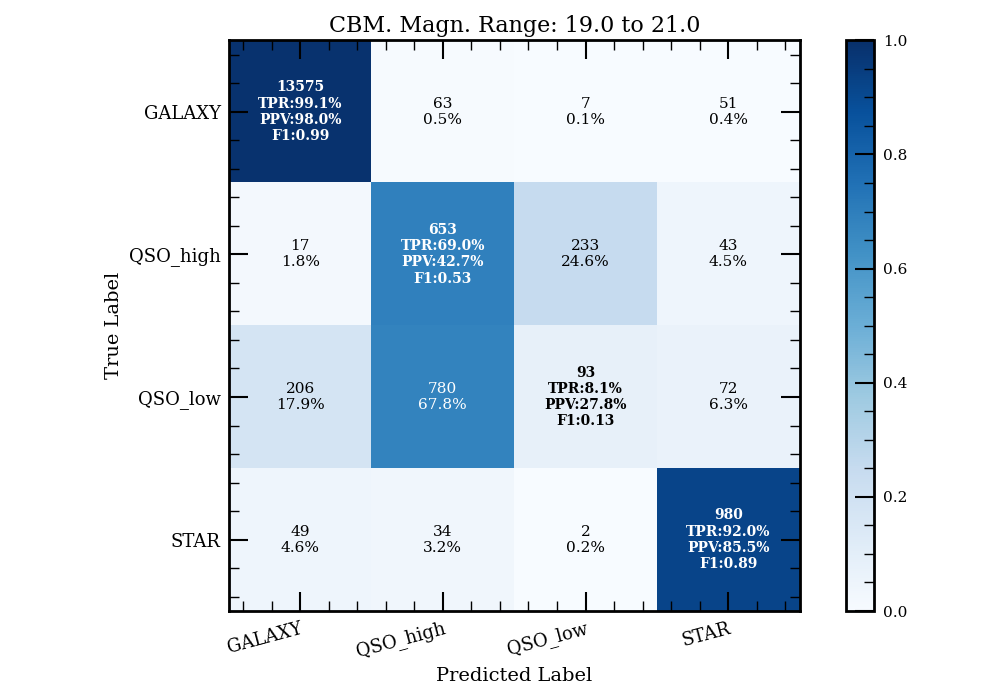

/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/JPAS_DA/evaluation/evaluation_tools.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


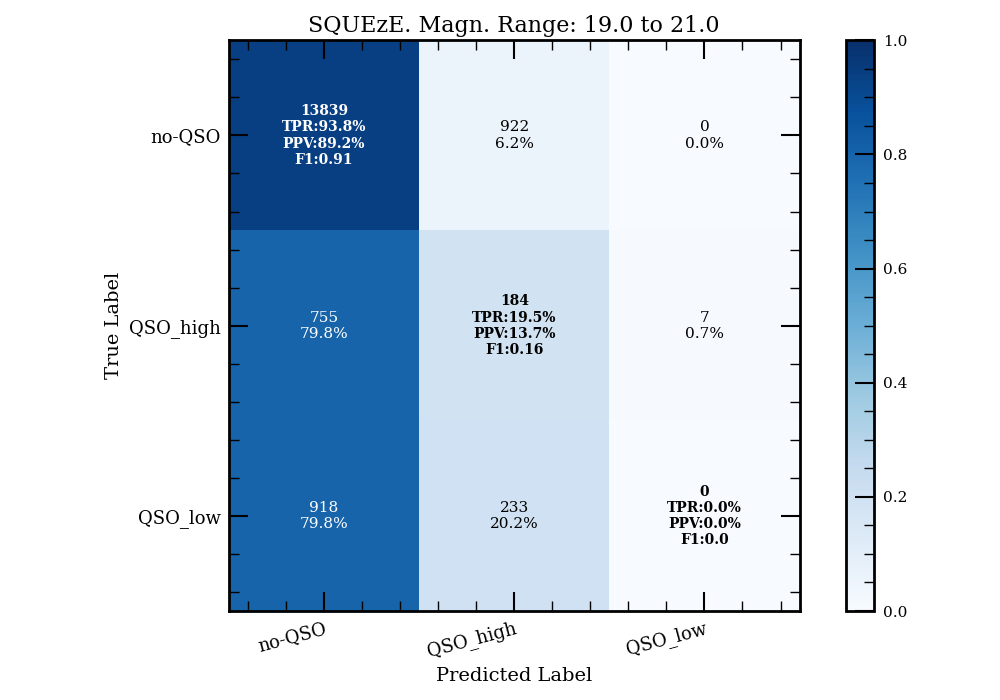

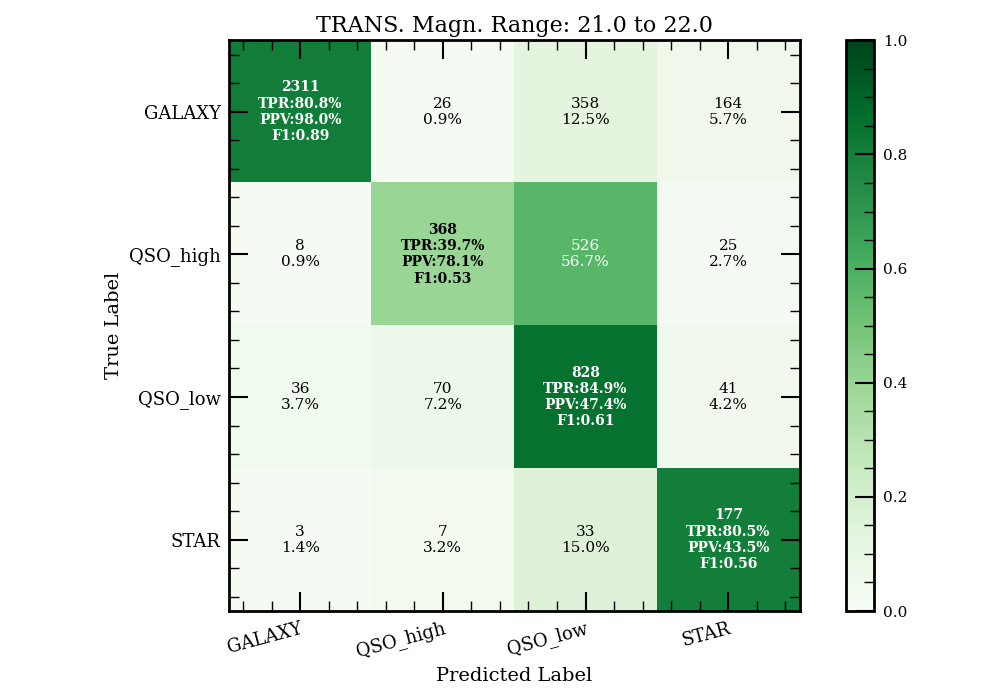

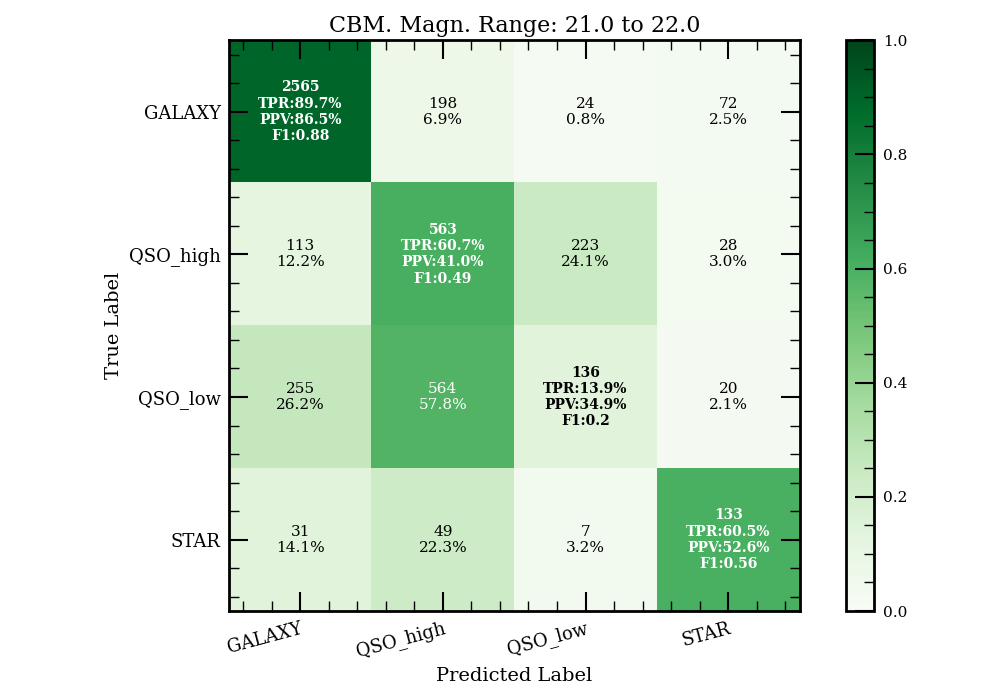

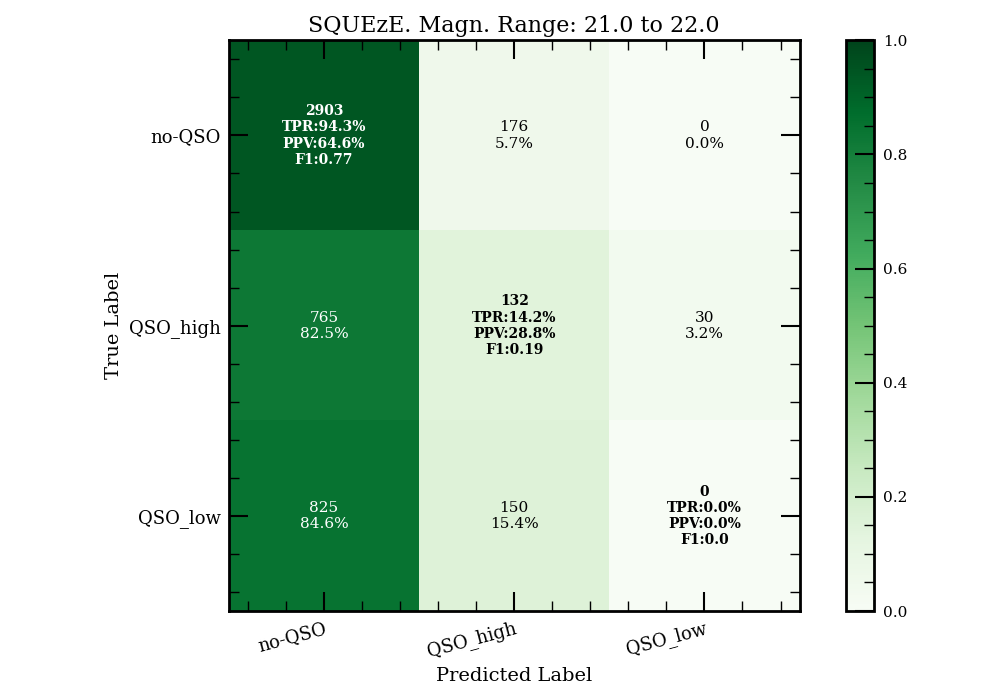

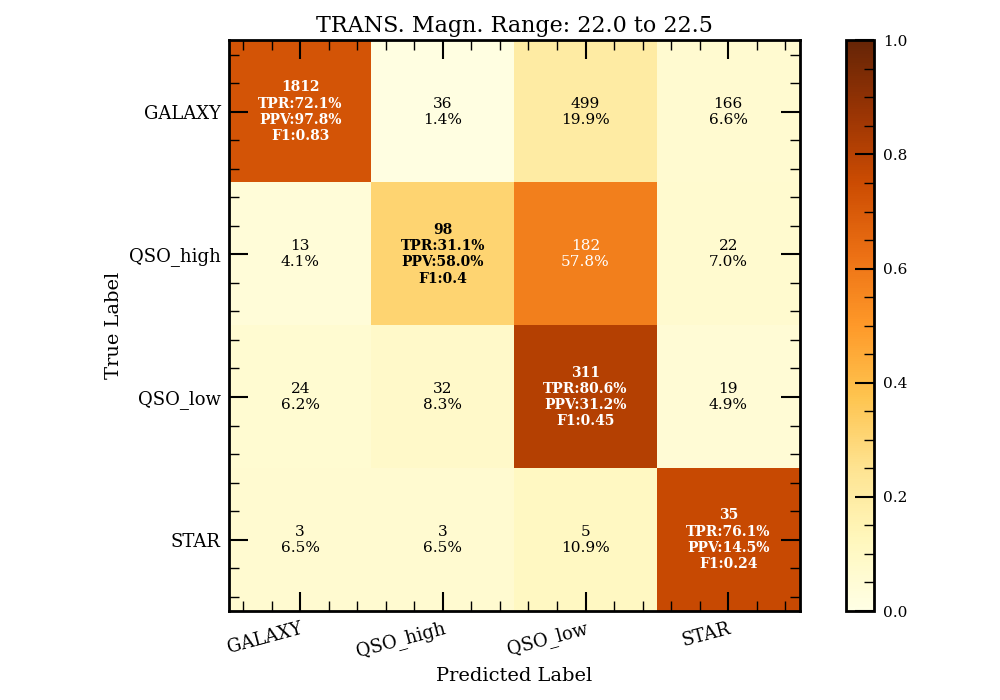

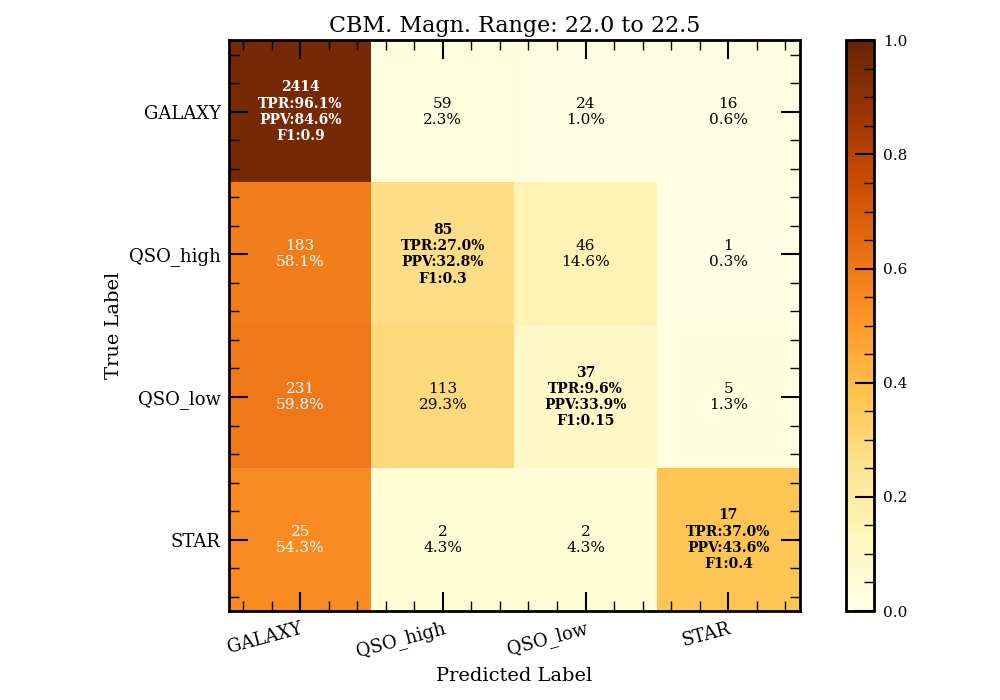

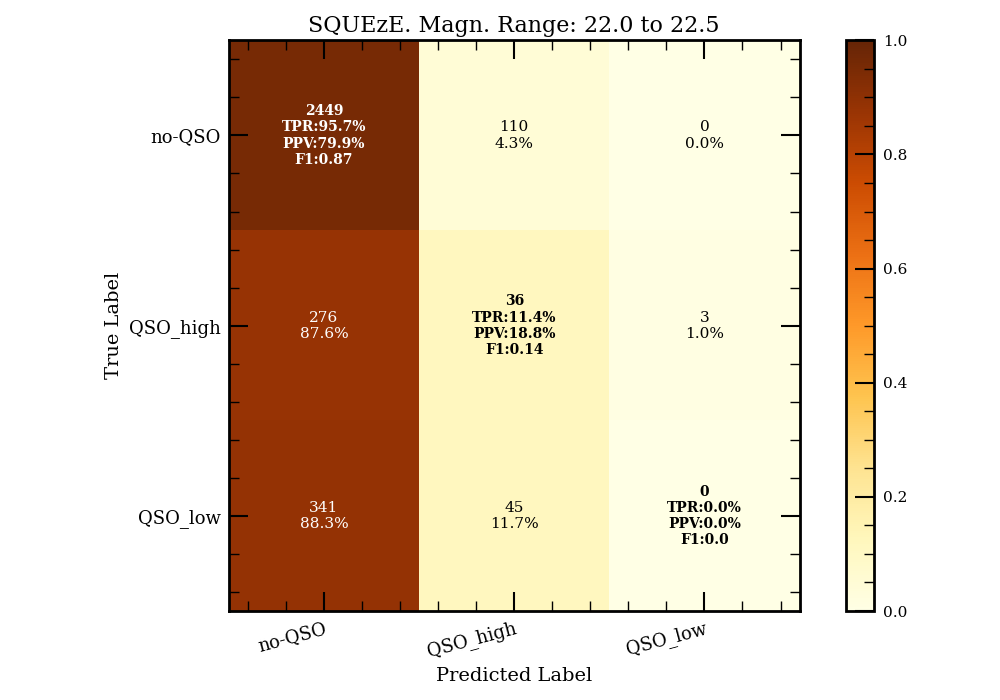

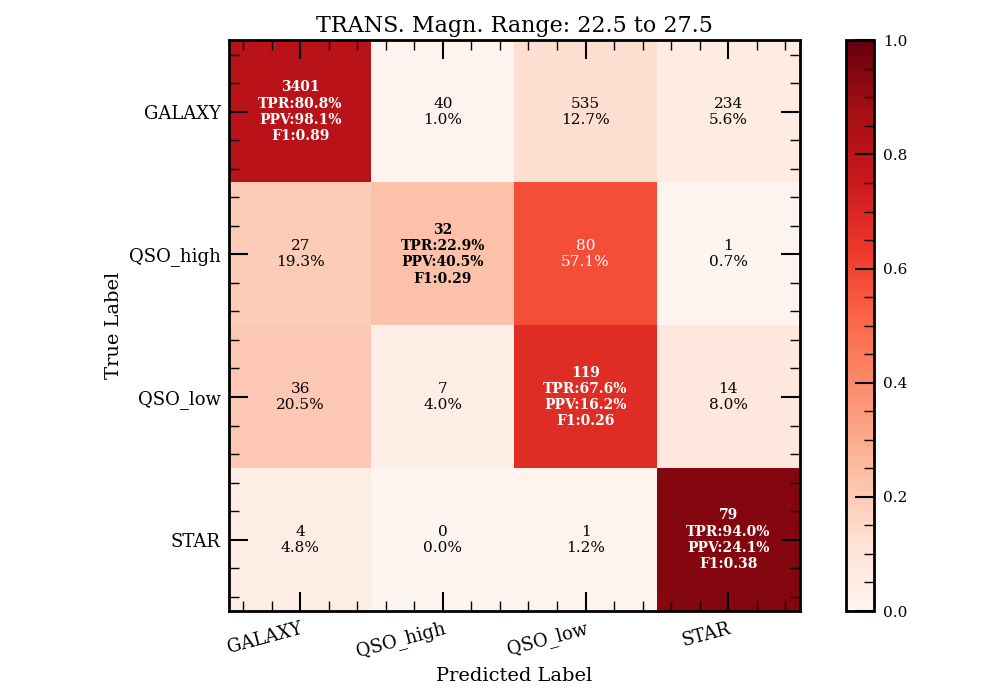

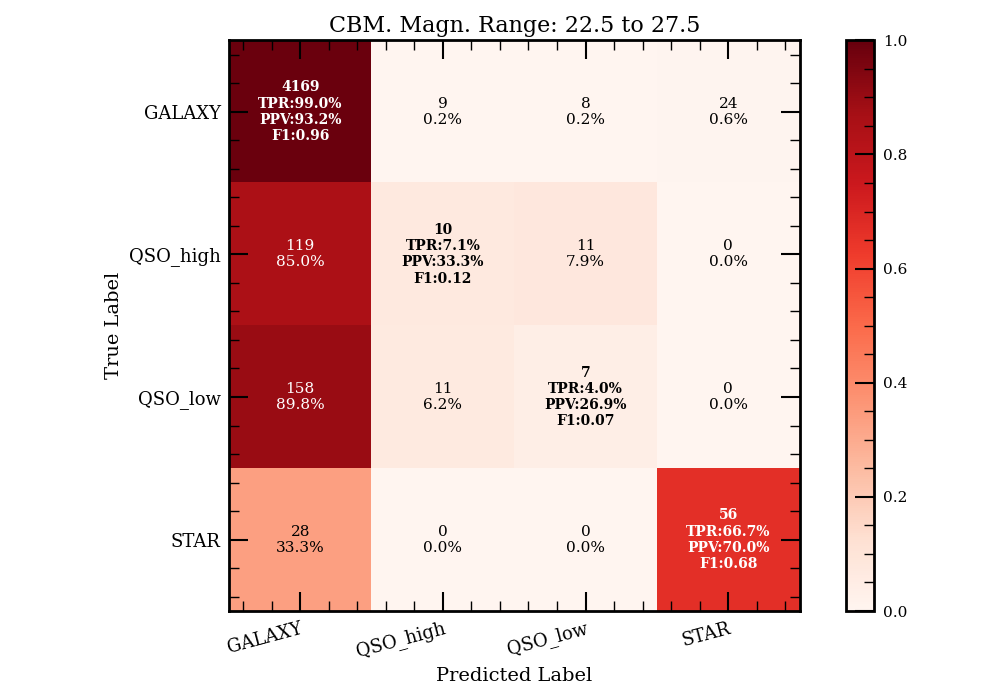

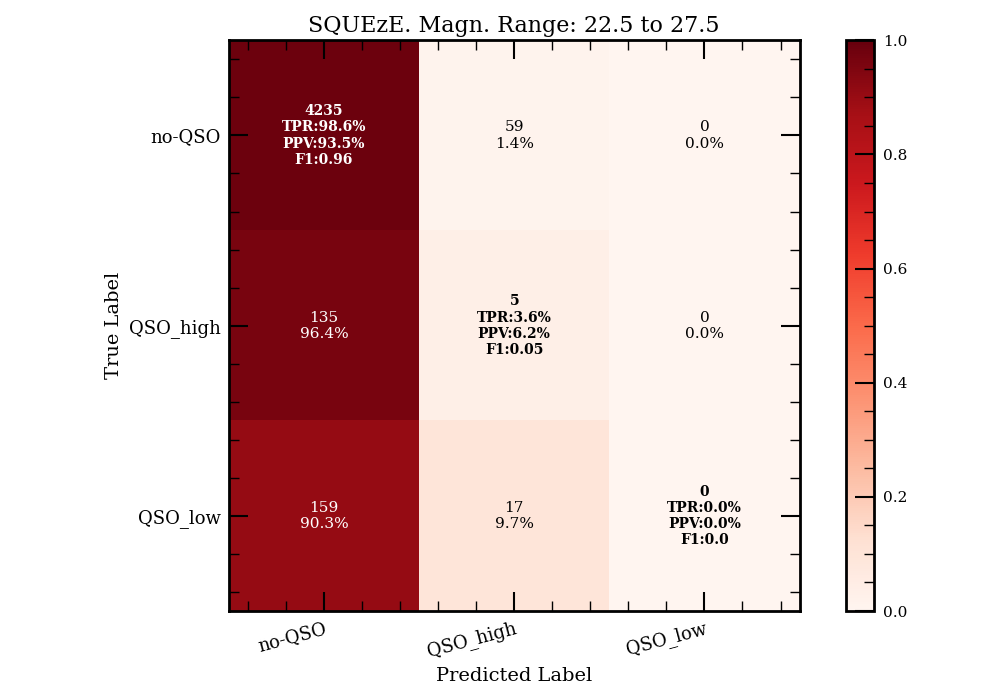

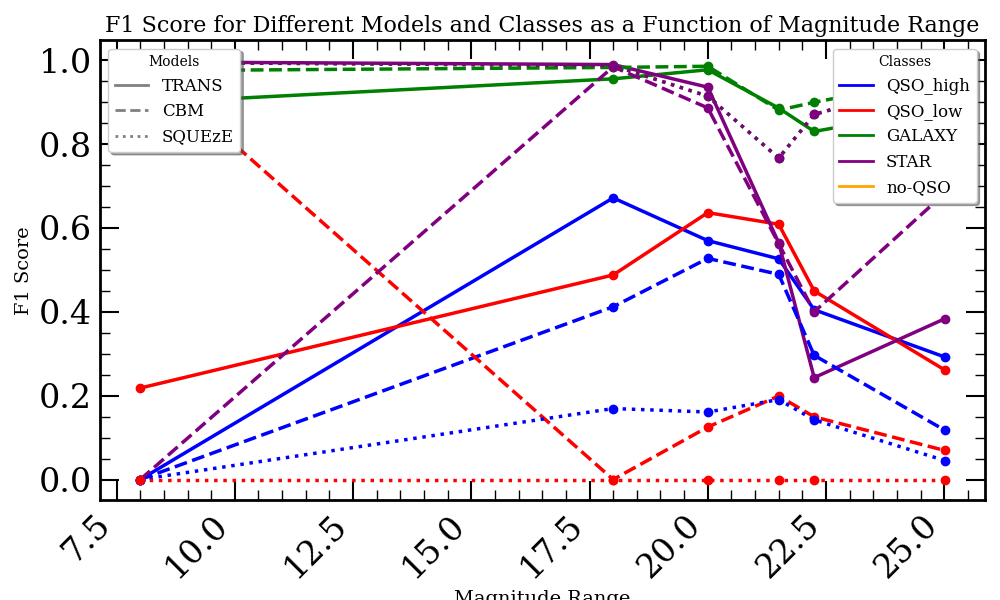

In [23]:
from sklearn.metrics import f1_score

# Initialize an empty dictionary to store the F1 scores for each model
f1_scores_dict = {key_model: {class_name: [] for class_name in class_names} for key_model in yy_pred_P.keys()}

# Class mapping for SQUEzE, where "GALAXY" and "STAR" are grouped under "no-QSO"
squeeze_class_mapping = {
    "no-QSO": ["GALAXY", "STAR"],
    "QSO_high": ["QSO_high"], 
    "QSO_low": ["QSO_low"]
}

# Loop over magnitude ranges and models
for ii, key_mag in enumerate(masks_R_magnitudes_in_DESI_finite.keys()):
    lower, upper = key_mag.split('_')
    mag_title = f'Magn. Range: {float(lower):.1f} to {float(upper):.1f}'

    for jj, key_model in enumerate(yy_pred_P.keys()):

        tmp_yy_pred_P = yy_pred_P[key_model]
        tmp_yy_pred_P = tmp_yy_pred_P[mask_finite_R_in_DESI]
        tmp_mask = ~mask_dense_finite_R & masks_R_magnitudes_in_DESI_finite[key_mag]
        tmp_yy_pred_P = tmp_yy_pred_P[tmp_mask]

        if key_model != "SQUEzE":
            tmp_yy_true = yy_true
            tmp_class_names = class_names
        if key_model == "SQUEzE":
            tmp_yy_true = yy_true_SQUEzE
            tmp_class_names = list(squeeze_class_mapping.keys())  # Use the mapped class names for SQUEzE

        tmp_yy_true = tmp_yy_true[mask_finite_R_in_DESI]
        tmp_yy_true = tmp_yy_true[tmp_mask]

        tmp_counts, tmp_labels = np.unique(tmp_yy_true, return_counts=True)
        
        # Calculate the confusion matrix for the current model and magnitude range
        cm = evaluation_tools.plot_confusion_matrix(
            tmp_yy_true, tmp_yy_pred_P,
            class_names=tmp_class_names, normalize=True,
            cmap=colormaps[ii], title=key_model + ". " + mag_title
        )
        
        # Calculate F1 scores for each class in the confusion matrix
        f1_scores = f1_score(tmp_yy_true, np.argmax(tmp_yy_pred_P, axis=1), average=None)

        # Ensure we're not appending to an index that doesn't exist in the current class names
        for idx, class_name in enumerate(tmp_class_names):
            # If the class is "no-QSO", handle it by assigning F1 scores for both "GALAXY" and "STAR"
            if key_model == "SQUEzE" and class_name == "no-QSO":
                # For "no-QSO", map to both "GALAXY" and "STAR" in other models
                for sub_class in squeeze_class_mapping[class_name]:
                    if sub_class in f1_scores_dict[key_model]:
                        f1_scores_dict[key_model][sub_class].append(f1_scores[idx])
            else:
                # For other models, append the F1 score directly
                if idx < len(f1_scores):
                    f1_scores_dict[key_model][class_name].append(f1_scores[idx])
                else:
                    f1_scores_dict[key_model][class_name].append(0.0)



# Define consistent colors for QSO_high and QSO_low across all models
class_colors = {
    "QSO_high": "blue",  # Color for QSO_high
    "QSO_low": "red",    # Color for QSO_low
    "GALAXY": "green",   # Color for GALAXY
    "STAR": "purple",    # Color for STAR
    "no-QSO": "orange"   # Color for no-QSO
}

# Define linestyles for different models
model_linestyles = {
    "TRANS": "-",
    "CBM": "--",
    "SQUEzE": ":",
}

# Create the plot
plt.figure(figsize=(10, 6))

# Plot F1 scores for each model and class
for key_model, f1_data in f1_scores_dict.items():
    for class_name, f1_values in f1_data.items():
        # Get the correct color for the class
        color = class_colors[class_name]

        # Get the correct linestyle for the model
        linestyle = model_linestyles.get(key_model, '-')

        # Plot the F1 scores
        tmp_xx = list(masks_R_magnitudes_in_DESI_finite.keys())

        # Convert to middle points of the ranges
        midpoints = []
        for range_str in tmp_xx:
            lower, upper = range_str.split('_')
            lower = float(lower)
            upper = float(upper)
            midpoint = (lower + upper) / 2  # Calculate the middle of the range
            midpoints.append(midpoint)

        plt.plot(midpoints, f1_values, 
                 label=f"{key_model} - {class_name}", linestyle=linestyle, 
                 marker='o', color=color)

plt.xlabel('Magnitude Range', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('F1 Score for Different Models and Classes as a Function of Magnitude Range', fontsize=16)
plt.xticks(rotation=45, ha='right')

custom_lines_model = [
    Line2D([0], [0], color='gray', linestyle=ls, lw=2) for ls in model_linestyles.values()
]
custom_labels_model = [f"{model}" for model in model_linestyles.keys()]

custom_lines_class = [
    Line2D([0], [0], color=color, lw=2) for color in class_colors.values()
]
custom_labels_class = [f"{class_name}" for class_name in class_colors.keys()]

legend_model = plt.legend(custom_lines_model, custom_labels_model, title="Models", loc="upper left", fontsize=12, fancybox=True, shadow=True)
plt.gca().add_artist(legend_model)  # Add the first legend

legend_class = plt.legend(custom_lines_class, custom_labels_class, title="Classes", loc="upper right", fontsize=12, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

# Extract IDs of problematic objects

In [24]:
print(JPAS_Ignasi.dtype.names)

('NUMBER', 'TILE_ID', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'MORPHTYPE', 'SPECID', 'DESI_MAG_R', 'DESI_MAG_G', 'DESI_MAG_Z', 'JPAS_RA', 'JPAS_DEC', 'label_TRANS', 'z_TRANS', 'z_err_TRANS', 'conf_gal_TRANS', 'conf_star_TRANS', 'conf_lqso_TRANS', 'conf_hqso_TRANS', 'class_TRANS', 'class_SQUEzE', 'conf_SQUEzE_0', 'z_SQUEzE_0', 'conf_SQUEzE_1', 'z_SQUEzE_1', 'conf_SQUEzE_2', 'z_SQUEzE_2', 'conf_SQUEzE_3', 'z_SQUEzE_3', 'conf_SQUEzE_4', 'z_SQUEzE_4', 'conf_gal_CBM', 'conf_lqso_CBM', 'conf_hqso_CBM', 'conf_star_CBM', 'class_CBM', 'conf_star', 'conf_gal', 'conf_lqso', 'conf_hqso', 'class', 'z', 'TARGETID', 'SURVEY', 'PROGRAM', 'HEALPIX', 'Z_DESI', 'ZERR_DESI', 'ZWARN', 'SPECTYPE', 'SUBTYPE', 'TARGET_RA', 'TARGET_DEC', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'match_sep_arcsec', 'is_in_desi_dr1')


In [25]:
TARGETID_in_DESI = np.array(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]])
TILE_ID_in_DESI = np.array(JPAS_Ignasi["TILE_ID"][JPAS_Ignasi["is_in_desi_dr1"]])
NUMBER_in_DESI = np.array(JPAS_Ignasi["NUMBER"][JPAS_Ignasi["is_in_desi_dr1"]])
SURVEY_in_DESI = np.array(JPAS_Ignasi["SURVEY"][JPAS_Ignasi["is_in_desi_dr1"]])
PROGRAM_in_DESI = np.array(JPAS_Ignasi["PROGRAM"][JPAS_Ignasi["is_in_desi_dr1"]])
HEALPIX_in_DESI = np.array(JPAS_Ignasi["HEALPIX"][JPAS_Ignasi["is_in_desi_dr1"]])

In [26]:
misclassified_objects = {}
for key_model in ["TRANS", "CBM"]:
    misclassified_objects[key_model] = {}
    for key_mag in masks_R_magnitudes_in_DESI_finite:

        tmp_mask = mask_dense_finite_R & masks_R_magnitudes_in_DESI_finite[key_mag]
        tmp_yy_pred_P = yy_pred_P[key_model]

        if key_model != "SQUEzE":
            tmp_yy_true = yy_true
            tmp_class_names = class_names
        if key_model == "SQUEzE":
            tmp_yy_true = yy_true_SQUEzE
            tmp_class_names = class_names_SQUEzE


        tmp_TARGETID_in_DESI = TARGETID_in_DESI[mask_finite_R_in_DESI][tmp_mask]
        tmp_TILE_ID_in_DESI = TILE_ID_in_DESI[mask_finite_R_in_DESI][tmp_mask]
        tmp_NUMBER_in_DESI = NUMBER_in_DESI[mask_finite_R_in_DESI][tmp_mask]
        tmp_SURVEY_in_DESI = SURVEY_in_DESI[mask_finite_R_in_DESI][tmp_mask]
        tmp_PROGRAM_in_DESI = PROGRAM_in_DESI[mask_finite_R_in_DESI][tmp_mask]
        tmp_HEALPIX_in_DESI = HEALPIX_in_DESI[mask_finite_R_in_DESI][tmp_mask]
        tmp_yy_true = tmp_yy_true[mask_finite_R_in_DESI][tmp_mask]
        tmp_yy_pred_P = tmp_yy_pred_P[mask_finite_R_in_DESI][tmp_mask]

        # cm = evaluation_tools.plot_confusion_matrix(
        #     tmp_yy_true, tmp_yy_pred_P,
        #     class_names=tmp_class_names, normalize=True,
        #     cmap=plt.cm.RdYlGn, title="Selected"
        # )

        # Create an empty dictionary to store the misclassified objects
        misclassified_objects[key_model][key_mag] = {
            "GALAXY_as_QSO_low": {"TARGET_ID": [], "TILE_ID": [], "NUMBER": [], "SURVEY": [], "PROGRAM": [], "HEALPIX": []},
            "QSO_high_as_QSO_low": {"TARGET_ID": [], "TILE_ID": [], "NUMBER": [], "SURVEY": [], "PROGRAM": [], "HEALPIX": []},
            "QSO_low_as_GALAXY": {"TARGET_ID": [], "TILE_ID": [], "NUMBER": [], "SURVEY": [], "PROGRAM": [], "HEALPIX": []},
            "QSO_low_as_QSO_high": {"TARGET_ID": [], "TILE_ID": [], "NUMBER": [], "SURVEY": [], "PROGRAM": [], "HEALPIX": []}
        }

        # Get the predicted classes (indices) from the probability array
        tmp_yy_pred_classes = np.argmax(tmp_yy_pred_P, axis=1)

        # Condition 1: GALAXY (true) but classified as QSO_low (pred)
        condition_galaxy_as_qso_low = (tmp_yy_true == 0) & (tmp_yy_pred_classes == 2)

        # Condition 2: QSO_high (true) but classified as QSO_low (pred)
        condition_qso_high_as_qso_low = (tmp_yy_true == 1) & (tmp_yy_pred_classes == 2)

        # Condition 3: QSO_low (true) but classified as GALAXY (pred)
        condition_qso_low_as_galaxy = (tmp_yy_true == 2) & (tmp_yy_pred_classes == 0)

        # Condition 4: QSO_low (true) but classified as QSO_high (pred)
        condition_qso_low_as_qso_high = (tmp_yy_true == 2) & (tmp_yy_pred_classes == 1)

        # Extract the corresponding information for each condition and store in the dictionary
        misclassified_objects[key_model][key_mag]["GALAXY_as_QSO_low"]["TARGET_ID"] = tmp_TARGETID_in_DESI[condition_galaxy_as_qso_low]
        misclassified_objects[key_model][key_mag]["GALAXY_as_QSO_low"]["TILE_ID"] = tmp_TILE_ID_in_DESI[condition_galaxy_as_qso_low]
        misclassified_objects[key_model][key_mag]["GALAXY_as_QSO_low"]["NUMBER"] = tmp_NUMBER_in_DESI[condition_galaxy_as_qso_low]
        misclassified_objects[key_model][key_mag]["GALAXY_as_QSO_low"]["SURVEY"] = tmp_SURVEY_in_DESI[condition_galaxy_as_qso_low]
        misclassified_objects[key_model][key_mag]["GALAXY_as_QSO_low"]["PROGRAM"] = tmp_PROGRAM_in_DESI[condition_galaxy_as_qso_low]
        misclassified_objects[key_model][key_mag]["GALAXY_as_QSO_low"]["HEALPIX"] = tmp_HEALPIX_in_DESI[condition_galaxy_as_qso_low]

        misclassified_objects[key_model][key_mag]["QSO_high_as_QSO_low"]["TARGET_ID"] = tmp_TARGETID_in_DESI[condition_qso_high_as_qso_low]
        misclassified_objects[key_model][key_mag]["QSO_high_as_QSO_low"]["TILE_ID"] = tmp_TILE_ID_in_DESI[condition_qso_high_as_qso_low]
        misclassified_objects[key_model][key_mag]["QSO_high_as_QSO_low"]["NUMBER"] = tmp_NUMBER_in_DESI[condition_qso_high_as_qso_low]
        misclassified_objects[key_model][key_mag]["QSO_high_as_QSO_low"]["SURVEY"] = tmp_SURVEY_in_DESI[condition_qso_high_as_qso_low]
        misclassified_objects[key_model][key_mag]["QSO_high_as_QSO_low"]["PROGRAM"] = tmp_PROGRAM_in_DESI[condition_qso_high_as_qso_low]
        misclassified_objects[key_model][key_mag]["QSO_high_as_QSO_low"]["HEALPIX"] = tmp_HEALPIX_in_DESI[condition_qso_high_as_qso_low]

        misclassified_objects[key_model][key_mag]["QSO_low_as_GALAXY"]["TARGET_ID"] = tmp_TARGETID_in_DESI[condition_qso_low_as_galaxy]
        misclassified_objects[key_model][key_mag]["QSO_low_as_GALAXY"]["TILE_ID"] = tmp_TILE_ID_in_DESI[condition_qso_low_as_galaxy]
        misclassified_objects[key_model][key_mag]["QSO_low_as_GALAXY"]["NUMBER"] = tmp_NUMBER_in_DESI[condition_qso_low_as_galaxy]
        misclassified_objects[key_model][key_mag]["QSO_low_as_GALAXY"]["SURVEY"] = tmp_SURVEY_in_DESI[condition_qso_low_as_galaxy]
        misclassified_objects[key_model][key_mag]["QSO_low_as_GALAXY"]["PROGRAM"] = tmp_PROGRAM_in_DESI[condition_qso_low_as_galaxy]
        misclassified_objects[key_model][key_mag]["QSO_low_as_GALAXY"]["HEALPIX"] = tmp_HEALPIX_in_DESI[condition_qso_low_as_galaxy]

        misclassified_objects[key_model][key_mag]["QSO_low_as_QSO_high"]["TARGET_ID"] = tmp_TARGETID_in_DESI[condition_qso_low_as_qso_high]
        misclassified_objects[key_model][key_mag]["QSO_low_as_QSO_high"]["TILE_ID"] = tmp_TILE_ID_in_DESI[condition_qso_low_as_qso_high]
        misclassified_objects[key_model][key_mag]["QSO_low_as_QSO_high"]["NUMBER"] = tmp_NUMBER_in_DESI[condition_qso_low_as_qso_high]
        misclassified_objects[key_model][key_mag]["QSO_low_as_QSO_high"]["SURVEY"] = tmp_SURVEY_in_DESI[condition_qso_low_as_qso_high]
        misclassified_objects[key_model][key_mag]["QSO_low_as_QSO_high"]["PROGRAM"] = tmp_PROGRAM_in_DESI[condition_qso_low_as_qso_high]
        misclassified_objects[key_model][key_mag]["QSO_low_as_QSO_high"]["HEALPIX"] = tmp_HEALPIX_in_DESI[condition_qso_low_as_qso_high]

In [27]:
import pickle

# Save the dictionary to a file
def save_dict_to_file(dictionary, filename):
    with open(filename, 'wb') as f:
        pickle.dump(dictionary, f)
    print(f"Dictionary saved to {filename}")

# Example usage:
save_dict_to_file(misclassified_objects, '/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA/misclassified_objects_dense.pkl')

Dictionary saved to /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA/misclassified_objects_dense.pkl
